In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.rename(columns = {'value':'views'}, inplace = True)
df.head()

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean data
df = df[(df['views'] >= df['views'].quantile(0.025)) &
        (df['views'] <= df['views'].quantile(0.975))]

## Draw line plot

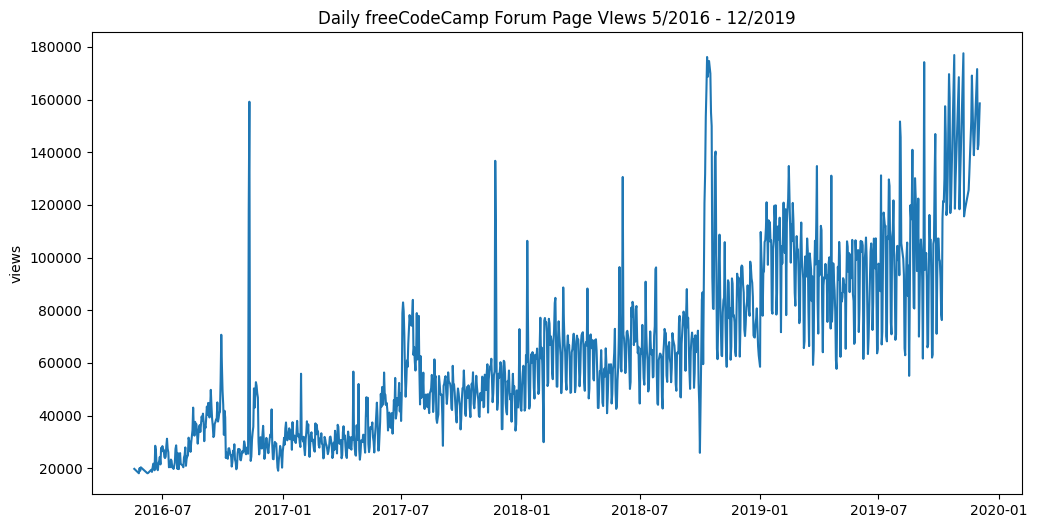

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df)
ax.set_ylabel('views')
ax.set_title('Daily freeCodeCamp Forum Page VIews 5/2016 - 12/2019')

plt.show()

## Draw bar plot

In [5]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['Years'] = [d.year for d in df_bar.date]
df_bar['Months'] = [d.strftime('%b') for d in df_bar.date]
df_bar = df_bar.drop(columns=['date'])

df_bar = df_bar.groupby(['Years', 'Months'],sort=False).mean().unstack("Months").droplevel(0, axis="columns")
df_bar = df_bar.fillna(0)

df_bar = df_bar[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

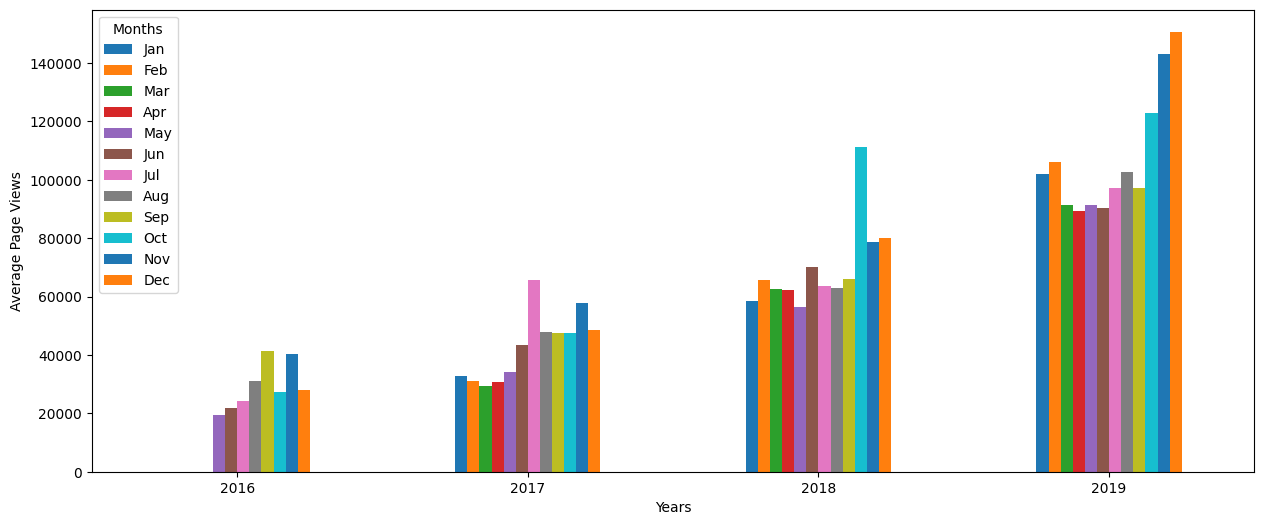

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
df_bar.plot.bar(rot=0, ax=ax)
ax.set_ylabel('Average Page Views')

plt.show()

## Draw box plots (using Seaborn)

In [7]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Years'] = [d.year for d in df_box.date]
df_box['Months'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,views,Years,Months
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


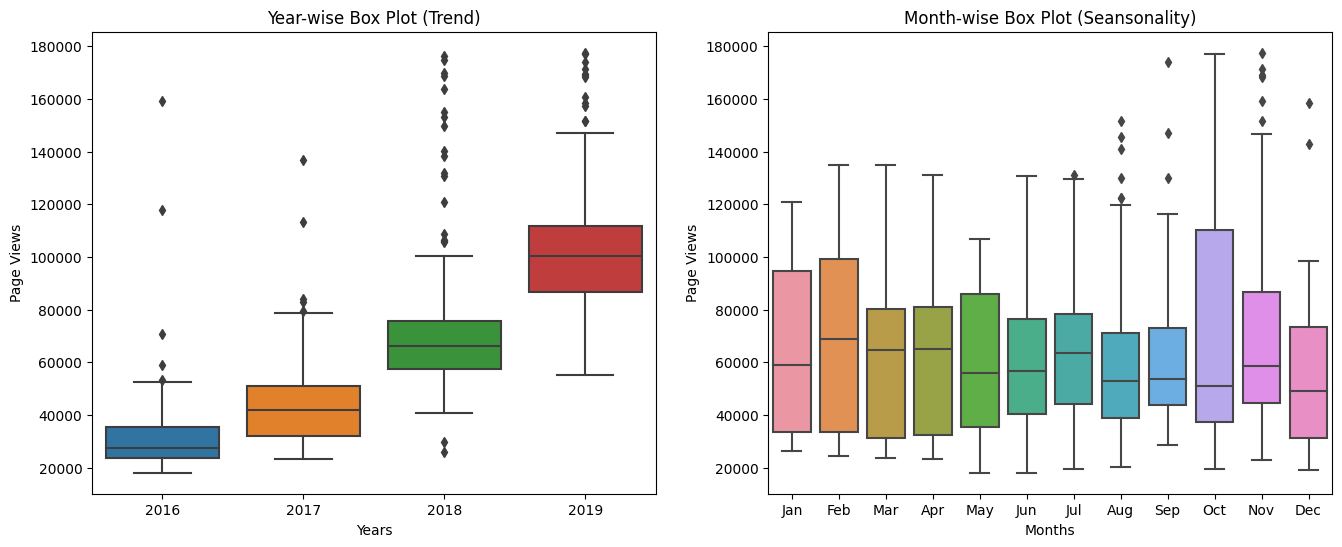

In [8]:
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(data = df_box, x = 'Years', y = 'views', ax = ax1)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_ylabel('Page Views')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data = df_box, x = 'Months', y = 'views', ax = ax2,
           order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_title('Month-wise Box Plot (Seansonality)')
ax2.set_ylabel('Page Views')

plt.show()